In [1]:
import pandas as pd
# Đọc dữ liệu từ file Excel
df = pd.read_excel('datachotot.xlsx')
df = df.iloc[:, 1:]

In [2]:
df.iloc[:, 0] = df.iloc[:, 0].str.replace('\nXem bản đồ', '')

In [3]:
df

,Address,Size,Rooms,Toilets,Legal Document,Furnishing Sell,Length,Width,Direction,Floors,House Type,Price
0,"Đường Thái Thị Giữ, Xã Bà Điểm, Huyện Hóc Môn,...",18 m²,2 phòng,2 phòng,Đã có sổ,NaN,NaN,NaN,NaN,1.0,"Nhà mặt phố, mặt tiền","35,28 triệu/m²"
1,"Huỳnh Văn Một, Phường Hiệp Tân, Quận Tân Phú, ...",72 m²,2 phòng,2 phòng,Đã có sổ,Nội thất đầy đủ,NaN,NaN,NaN,2.0,"Nhà mặt phố, mặt tiền","104,17 triệu/m²"
2,"Đường Nhị Bình 18, Xã Nhị Bình, Huyện Hóc Môn,...",260 m²,NaN,NaN,Đã có sổ,NaN,25 m,10.5 m,Nam,NaN,NaN,"23,85 triệu/m²"
3,"Đường Số 4, Phường Bình Hưng Hoà A, Quận Bình ...",52 m²,2 phòng,2 phòng,Đã có sổ,NaN,NaN,NaN,Đông,2.0,"Nhà ngõ, hẻm","60,58 triệu/m²"
4,"Phan Văn Trị, Phường 5, Quận Gò Vấp, Tp Hồ Chí...",47 m²,3 phòng,3 phòng,Đã có sổ,NaN,NaN,NaN,Tây Bắc,2.0,"Nhà ngõ, hẻm","111,7 triệu/m²"
...,...,...,...,...,...,...,...,...,...,...,...,...
16474,"Quốc Lộ 13, Phường Hiệp Bình Phước (Quận Thủ Đ...",250 m²,4 phòng,4 phòng,Đã có sổ,NaN,NaN,NaN,Đông Nam,2.0,Nhà biệt thự,72 triệu/m²
16475,"Hiệp Bình Chánh, Phường Hiệp Bình Chánh (Quận ...",175 m²,3 phòng,3 phòng,Đã có sổ,NaN,NaN,NaN,Đông Nam,2.0,Nhà biệt thự,"154,29 triệu/m²"
16476,"Đường Đinh Đức Thiện, Xã Bình Chánh, Huyện Bìn...",100 m²,3 phòng,3 phòng,Đã có sổ,Nội thất đầy đủ,NaN,NaN,NaN,1.0,"Nhà mặt phố, mặt tiền","16,8 triệu/m²"
16477,"Đường 1A, Xã Vĩnh Lộc B, Huyện Bình Chánh, Tp ...",48 m²,2 phòng,2 phòng,Giấy tờ viết tay,NaN,12 m,4 m,NaN,NaN,"Nhà ngõ, hẻm","43,75 triệu/m²"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16479 entries, 0 to 16478
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Address          15763 non-null  object 
 1   Size             15777 non-null  object 
 2   Rooms            13528 non-null  object 
 3   Toilets          10655 non-null  object 
 4   Legal Document   14947 non-null  object 
 5   Furnishing Sell  4760 non-null   object 
 6   Length           3388 non-null   object 
 7   Width            5590 non-null   object 
 8   Direction        3802 non-null   object 
 9   Floors           7616 non-null   float64
 10  House Type       11497 non-null  object 
 11  Price            15777 non-null  object 
dtypes: float64(1), object(11)
memory usage: 1.5+ MB


I. DATA CLEANING

In [5]:
# DATA DIỆN TÍCH
df1 = df[df.Size.notnull()]
df1['Size'] = df1['Size'].str.replace(' m²', '').str.strip()

# DATA GIÁ
# Create df2 with non-null Price values
df2 = df1[df1.Price.notnull()]
df2 = df2[~df2['Price'].str.contains('đ/m²|tỷ/m²')]
df2['Price'] = df2['Price'].str.replace(' triệu/m²', '').str.replace(' triệu/m2', '')
df2['Price'] = df2['Price'].str.replace(',', '').astype(float) * 1000000
# DATA PHÒNG
df3 = df2[df2.Rooms.notnull()]
df3['Rooms'] = df3['Rooms'].str.replace('nhiều hơn', '').str.replace('Nhiều hơn', '').str.replace('phòng', '').str.strip()
# DATA Toilets
df4 = df3[df3.Toilets.notnull()]
df4['Toilets'] = df4['Toilets'].str.replace('Nhiều hơn ', '').str.replace('phòng', '').str.strip()
# DATA ĐỊA CHỈ
df4['District'] = df.Address.copy()
df4 = df4[df4.District.notnull()]
df4['District'] = df4['Address'].str.rsplit(',', 1).str[0].str.strip()
df4['District'] = df4['District'].str.rsplit(',', 1).str[-1].str.strip()
# Định nghĩa một dictionary để thay thế các giá trị cũ thành giá trị mới
new_names = {
    'Sổ chung / công chứng vi bằng': 'Sổ chung ','1': 'Giấy tờ khác ','3': 'Giấy tờ khác '
}
# Đổi tên các dòng trong cột 'Direction'
df4['Legal Document'] = df4['Legal Document'].replace(new_names)

C:\Users\HP\AppData\Local\Temp\ipykernel_49468\2400893099.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Size'] = df1['Size'].str.replace(' m²', '').str.strip()
C:\Users\HP\AppData\Local\Temp\ipykernel_49468\2400893099.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Rooms'] = df3['Rooms'].str.replace('nhiều hơn', '').str.replace('Nhiều hơn', '').str.replace('phòng', '').str.strip()
C:\Users\HP\AppData\Local\Temp\ipykernel_49468\2400893099.py:16: SettingWithCopyWarning: 
A value is trying

In [6]:
df4

,Address,Size,Rooms,Toilets,Legal Document,Furnishing Sell,Length,Width,Direction,Floors,House Type,Price,District
0,"Đường Thái Thị Giữ, Xã Bà Điểm, Huyện Hóc Môn,...",18,2,2,Đã có sổ,NaN,NaN,NaN,NaN,1.0,"Nhà mặt phố, mặt tiền",3.528000e+09,Huyện Hóc Môn
1,"Huỳnh Văn Một, Phường Hiệp Tân, Quận Tân Phú, ...",72,2,2,Đã có sổ,Nội thất đầy đủ,NaN,NaN,NaN,2.0,"Nhà mặt phố, mặt tiền",1.041700e+10,Quận Tân Phú
3,"Đường Số 4, Phường Bình Hưng Hoà A, Quận Bình ...",52,2,2,Đã có sổ,NaN,NaN,NaN,Đông,2.0,"Nhà ngõ, hẻm",6.058000e+09,Quận Bình Tân
4,"Phan Văn Trị, Phường 5, Quận Gò Vấp, Tp Hồ Chí...",47,3,3,Đã có sổ,NaN,NaN,NaN,Tây Bắc,2.0,"Nhà ngõ, hẻm",1.117000e+09,Quận Gò Vấp
7,"Đô Đốc Chấn, Phường Sơn Kỳ, Quận Tân Phú, Tp H...",92.6999,4,2,Đã có sổ,NaN,NaN,NaN,NaN,1.0,"Nhà mặt phố, mặt tiền",7.400000e+07,Quận Tân Phú
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16474,"Quốc Lộ 13, Phường Hiệp Bình Phước (Quận Thủ Đ...",250,4,4,Đã có sổ,NaN,NaN,NaN,Đông Nam,2.0,Nhà biệt thự,7.200000e+07,Thành phố Thủ Đức
16475,"Hiệp Bình Chánh, Phường Hiệp Bình Chánh (Quận ...",175,3,3,Đã có sổ,NaN,NaN,NaN,Đông Nam,2.0,Nhà biệt thự,1.542900e+10,Thành phố Thủ Đức
16476,"Đường Đinh Đức Thiện, Xã Bình Chánh, Huyện Bìn...",100,3,3,Đã có sổ,Nội thất đầy đủ,NaN,NaN,NaN,1.0,"Nhà mặt phố, mặt tiền",1.680000e+08,Huyện Bình Chánh
16477,"Đường 1A, Xã Vĩnh Lộc B, Huyện Bình Chánh, Tp ...",48,2,2,Giấy tờ viết tay,NaN,12 m,4 m,NaN,NaN,"Nhà ngõ, hẻm",4.375000e+09,Huyện Bình Chánh


In [7]:
frame = df4[['Address','District','Size','Rooms','Toilets','Legal Document','Furnishing Sell','Direction','Floors' ,'House Type',"Price"]]

In [8]:
frame

,Address,District,Size,Rooms,Toilets,Legal Document,Furnishing Sell,Direction,Floors,House Type,Price
0,"Đường Thái Thị Giữ, Xã Bà Điểm, Huyện Hóc Môn,...",Huyện Hóc Môn,18,2,2,Đã có sổ,NaN,NaN,1.0,"Nhà mặt phố, mặt tiền",3.528000e+09
1,"Huỳnh Văn Một, Phường Hiệp Tân, Quận Tân Phú, ...",Quận Tân Phú,72,2,2,Đã có sổ,Nội thất đầy đủ,NaN,2.0,"Nhà mặt phố, mặt tiền",1.041700e+10
3,"Đường Số 4, Phường Bình Hưng Hoà A, Quận Bình ...",Quận Bình Tân,52,2,2,Đã có sổ,NaN,Đông,2.0,"Nhà ngõ, hẻm",6.058000e+09
4,"Phan Văn Trị, Phường 5, Quận Gò Vấp, Tp Hồ Chí...",Quận Gò Vấp,47,3,3,Đã có sổ,NaN,Tây Bắc,2.0,"Nhà ngõ, hẻm",1.117000e+09
7,"Đô Đốc Chấn, Phường Sơn Kỳ, Quận Tân Phú, Tp H...",Quận Tân Phú,92.6999,4,2,Đã có sổ,NaN,NaN,1.0,"Nhà mặt phố, mặt tiền",7.400000e+07
...,...,...,...,...,...,...,...,...,...,...,...
16474,"Quốc Lộ 13, Phường Hiệp Bình Phước (Quận Thủ Đ...",Thành phố Thủ Đức,250,4,4,Đã có sổ,NaN,Đông Nam,2.0,Nhà biệt thự,7.200000e+07
16475,"Hiệp Bình Chánh, Phường Hiệp Bình Chánh (Quận ...",Thành phố Thủ Đức,175,3,3,Đã có sổ,NaN,Đông Nam,2.0,Nhà biệt thự,1.542900e+10
16476,"Đường Đinh Đức Thiện, Xã Bình Chánh, Huyện Bìn...",Huyện Bình Chánh,100,3,3,Đã có sổ,Nội thất đầy đủ,NaN,1.0,"Nhà mặt phố, mặt tiền",1.680000e+08
16477,"Đường 1A, Xã Vĩnh Lộc B, Huyện Bình Chánh, Tp ...",Huyện Bình Chánh,48,2,2,Giấy tờ viết tay,NaN,NaN,NaN,"Nhà ngõ, hẻm",4.375000e+09


In [9]:
frame.Size = frame.Size.astype('float')
frame.Rooms = frame.Rooms.astype('int') 
frame.Toilets = frame.Toilets.astype('int') 
frame.Price = frame.Price.astype('float') 
frame.describe()

C:\Users\HP\AppData\Local\Temp\ipykernel_49468\1655097652.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame.Size = frame.Size.astype('float')
C:\Users\HP\AppData\Local\Temp\ipykernel_49468\1655097652.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame.Rooms = frame.Rooms.astype('int')
C:\Users\HP\AppData\Local\Temp\ipykernel_49468\1655097652.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


,Size,Rooms,Toilets,Floors,Price
count,10623.000000,10623.000000,10623.000000,6915.000000,1.062300e+04
mean,73.628854,3.266685,2.985786,2.908026,7.260647e+09
std,107.540536,1.706464,1.463446,2.800097,6.666372e+09
min,10.000000,1.000000,1.000000,1.000000,3.000000e+06
25%,44.000000,2.000000,2.000000,2.000000,1.929500e+09
50%,60.000000,3.000000,3.000000,3.000000,6.415000e+09
75%,80.000000,4.000000,4.000000,4.000000,1.062500e+10
max,5020.000000,10.000000,6.000000,61.000000,9.444400e+10


In [10]:
frame['USD'] = round(frame['Price']/25470,0)

C:\Users\HP\AppData\Local\Temp\ipykernel_49468\374727876.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame['USD'] = round(frame['Price']/25470,0)


In [11]:
frame['USD'].describe()


count    1.062300e+04
mean     2.850666e+05
std      2.617343e+05
min      1.180000e+02
25%      7.575600e+04
50%      2.518650e+05
75%      4.171570e+05
max      3.708049e+06
Name: USD, dtype: float64

In [12]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10623 entries, 0 to 16478
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Address          10623 non-null  object 
 1   District         10623 non-null  object 
 2   Size             10623 non-null  float64
 3   Rooms            10623 non-null  int32  
 4   Toilets          10623 non-null  int32  
 5   Legal Document   10000 non-null  object 
 6   Furnishing Sell  4154 non-null   object 
 7   Direction        2958 non-null   object 
 8   Floors           6915 non-null   float64
 9   House Type       8820 non-null   object 
 10  Price            10623 non-null  float64
 11  USD              10623 non-null  float64
dtypes: float64(4), int32(2), object(6)
memory usage: 995.9+ KB


II. DATA VISUALIZATION

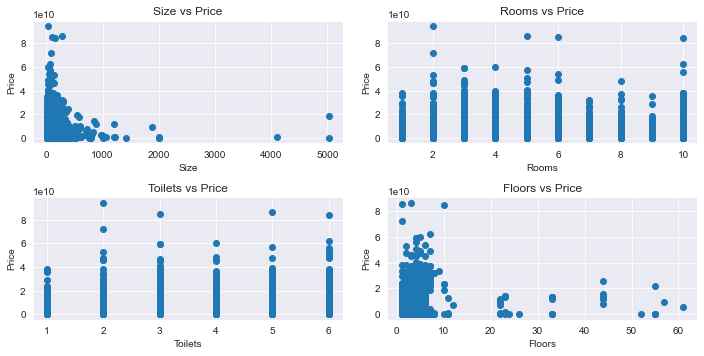

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(frame[x],frame['Price'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)


plt.figure(figsize=(10,12))

scatter('Size', 1)
scatter('Rooms', 2)
scatter('Toilets', 3)
scatter('Floors', 4)

plt.tight_layout()

In [14]:
frame1 = frame[['District','Size','Rooms','Toilets','Legal Document','Furnishing Sell','Direction','Floors' ,'House Type',"Price",'USD']]
bins = [1.180000e+02,7.642300e+04,2.854480e+05,3.708049e+06]

In [15]:
def A(col):
    temp = frame1.copy()
    table = temp.groupby([col])['USD'].mean()
    temp = temp.merge(table.reset_index(), how='left',on=col)
    cars_bin=['Low','Medium','High']
    frame1['range'] = pd.cut(temp['USD_y'],bins,right=False,labels=cars_bin)
    plt.rcParams['figure.figsize'] = (18, 8)
    df = pd.DataFrame(frame1.groupby([col,'range'])['USD'].mean().unstack(fill_value=0))
    df.plot.bar()
    plt.title('House vs Price')
    plt.show()

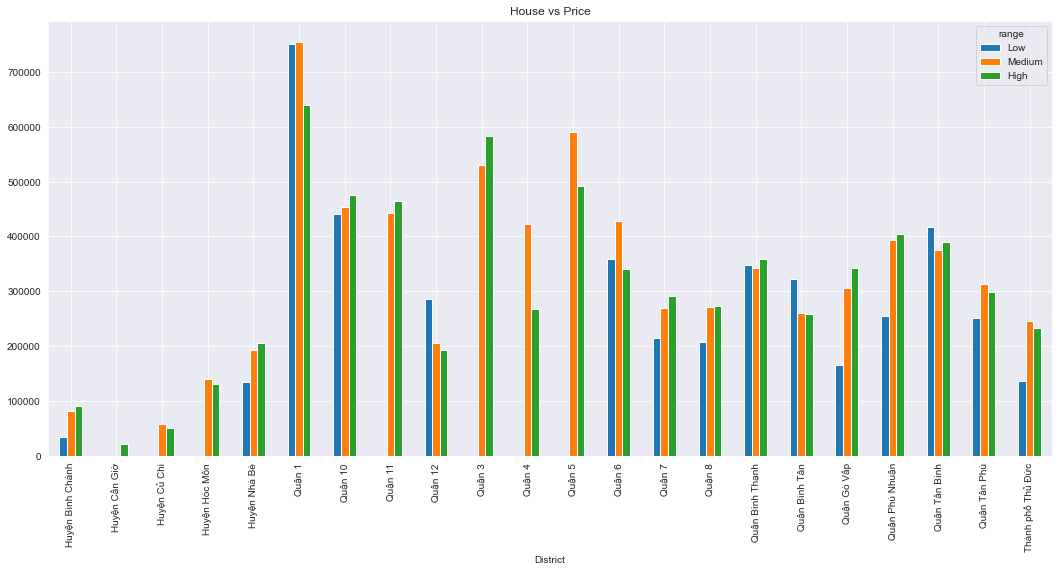

In [16]:
A('District')

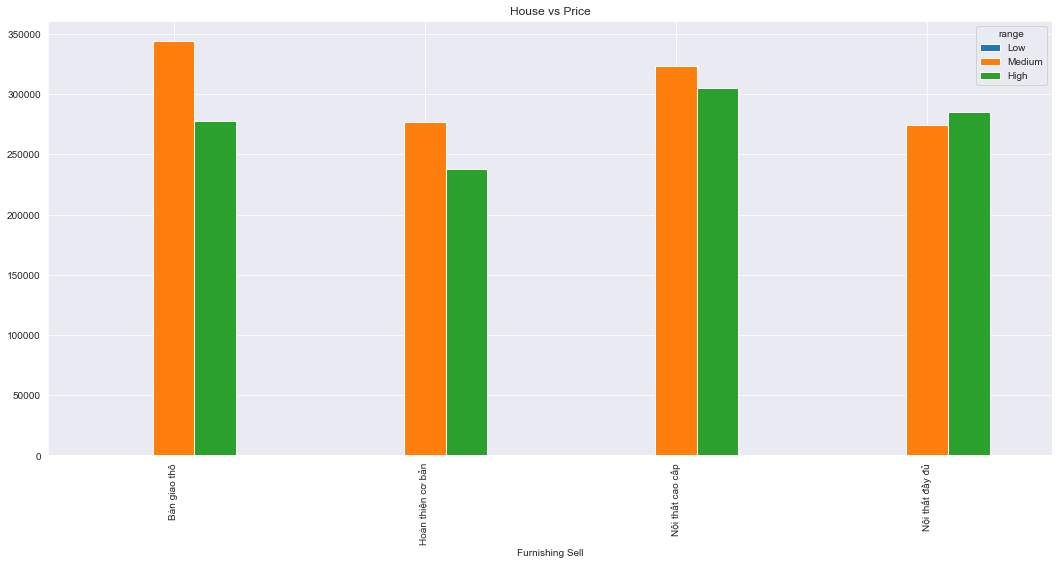

In [17]:
A('Furnishing Sell')

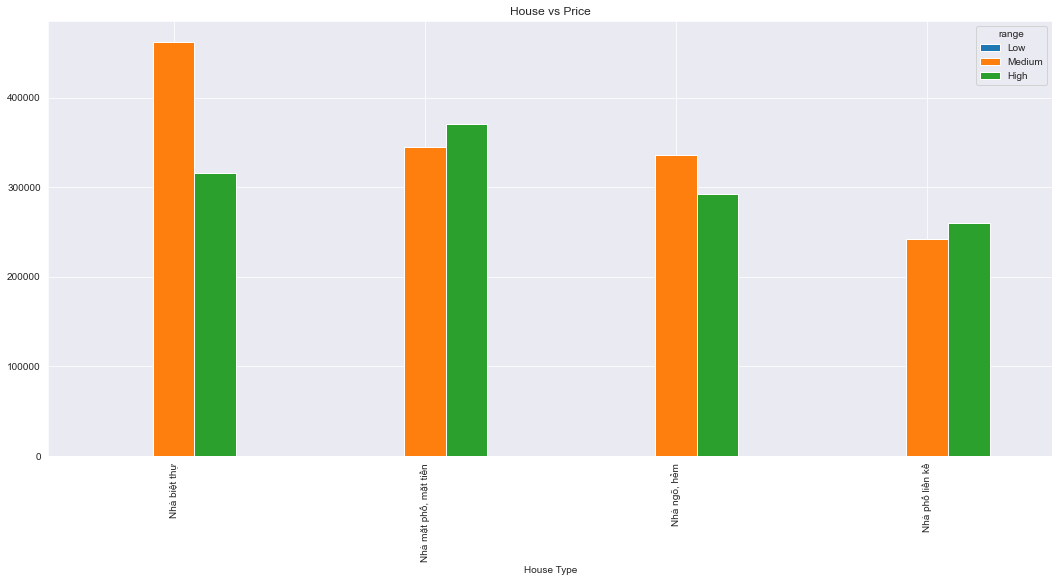

In [18]:
A('House Type')

Đông Nam    424
Đông        329
Tây         299
Đông Bắc    273
Tây Bắc     266
Tây Nam     253
Nam         246
Bắc         237
Name: Direction, dtype: int64


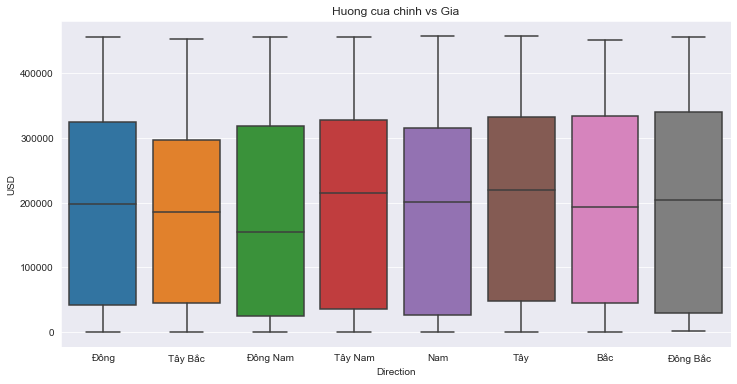

Đã có sổ            6359
Sổ hồng riêng        558
Hợp đồng mua bán     413
Sổ chung             260
Đang chờ sổ          165
Giấy tờ khác          61
Giấy tờ viết tay      45
Hợp đồng đặt cọc      22
Không có sổ           16
Name: Legal Document, dtype: int64


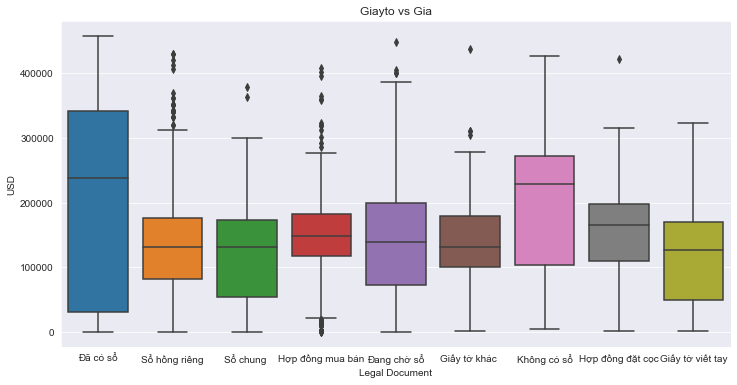

In [19]:
#remaining variables and Gia
test = frame1[frame1.USD <frame1.USD.quantile(0.8)]
plt.rcParams['figure.figsize'] = (12, 6)

print(test.Direction.value_counts())
sns.boxplot(x=test.Direction, y=test.USD)
plt.title('Huong cua chinh vs Gia')
plt.show()

print(test["Legal Document"].value_counts())
sns.boxplot(x=test["Legal Document"], y=test["USD"])
plt.title('Giayto vs Gia')
plt.show()

III. BUILD MODEL

In [20]:
frame1

,District,Size,Rooms,Toilets,Legal Document,Furnishing Sell,Direction,Floors,House Type,Price,USD,range
0,Huyện Hóc Môn,18.0000,2,2,Đã có sổ,NaN,NaN,1.0,"Nhà mặt phố, mặt tiền",3.528000e+09,138516.0,High
1,Quận Tân Phú,72.0000,2,2,Đã có sổ,Nội thất đầy đủ,NaN,2.0,"Nhà mặt phố, mặt tiền",1.041700e+10,408991.0,High
3,Quận Bình Tân,52.0000,2,2,Đã có sổ,NaN,Đông,2.0,"Nhà ngõ, hẻm",6.058000e+09,237848.0,High
4,Quận Gò Vấp,47.0000,3,3,Đã có sổ,NaN,Tây Bắc,2.0,"Nhà ngõ, hẻm",1.117000e+09,43856.0,High
7,Quận Tân Phú,92.6999,4,2,Đã có sổ,NaN,NaN,1.0,"Nhà mặt phố, mặt tiền",7.400000e+07,2905.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
16474,Thành phố Thủ Đức,250.0000,4,4,Đã có sổ,NaN,Đông Nam,2.0,Nhà biệt thự,7.200000e+07,2827.0,NaN
16475,Thành phố Thủ Đức,175.0000,3,3,Đã có sổ,NaN,Đông Nam,2.0,Nhà biệt thự,1.542900e+10,605771.0,NaN
16476,Huyện Bình Chánh,100.0000,3,3,Đã có sổ,Nội thất đầy đủ,NaN,1.0,"Nhà mặt phố, mặt tiền",1.680000e+08,6596.0,NaN
16477,Huyện Bình Chánh,48.0000,2,2,Giấy tờ viết tay,NaN,NaN,NaN,"Nhà ngõ, hẻm",4.375000e+09,171771.0,NaN


In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [22]:
## Tìm những trường dữ liệu có giá trị NaN
nan_values = frame1.isna()
nan_columns = nan_values.any()
columns_with_nan = frame1.columns[nan_columns].tolist()
columns_with_nan

['Legal Document',
 'Furnishing Sell',
 'Direction',
 'Floors',
 'House Type',
 'range']

In [25]:
## Tỉ lệ NaN của các trường dữ liệu
frame1.isna().sum()/frame1.shape[0]*100

District            0.000000
Size                0.000000
Rooms               0.000000
Toilets             0.000000
Legal Document      5.864633
Furnishing Sell    60.896169
Direction          72.154759
Floors             34.905394
House Type         16.972607
Price               0.000000
USD                 0.000000
range              44.789607
Rank                0.000000
dtype: float64

In [26]:
per = 0.5  # Chọn xóa những cột dữ liệu có trên 50% data là NaN
frame1_dropped = frame1.dropna(axis=1, thresh=int(frame1.shape[0] * per))
frame1_dropped_2 = frame1_dropped.dropna(how='any')
frame1_dropped_2

,District,Size,Rooms,Toilets,Legal Document,Floors,House Type,Price,USD,range,Rank
0,Huyện Hóc Môn,18.0000,2,2,Đã có sổ,1.0,"Nhà mặt phố, mặt tiền",3.528000e+09,138516.0,High,3.0
1,Quận Tân Phú,72.0000,2,2,Đã có sổ,2.0,"Nhà mặt phố, mặt tiền",1.041700e+10,408991.0,High,4.0
3,Quận Bình Tân,52.0000,2,2,Đã có sổ,2.0,"Nhà ngõ, hẻm",6.058000e+09,237848.0,High,4.0
4,Quận Gò Vấp,47.0000,3,3,Đã có sổ,2.0,"Nhà ngõ, hẻm",1.117000e+09,43856.0,High,1.0
9,Quận 7,60.0000,7,6,Đã có sổ,7.0,"Nhà mặt phố, mặt tiền",2.583300e+10,1014252.0,High,4.0
...,...,...,...,...,...,...,...,...,...,...,...
10609,Quận Bình Tân,45.7000,2,2,Đã có sổ,2.0,"Nhà ngõ, hẻm",9.847000e+09,386612.0,High,4.0
10616,Thành phố Thủ Đức,76.6997,3,2,Đã có sổ,2.0,"Nhà ngõ, hẻm",6.128000e+09,240597.0,High,4.0
10619,Quận 12,70.0000,3,4,Đã có sổ,4.0,"Nhà ngõ, hẻm",9.286000e+09,364586.0,High,4.0
10621,Quận Bình Thạnh,39.0000,2,2,Đã có sổ,2.0,"Nhà ngõ, hẻm",1.225600e+10,481194.0,High,4.0


In [27]:
frame_x = frame1_dropped_2.iloc[:, 0:7]
frame_y = frame1_dropped_2.iloc[:,8]

In [28]:
data_dummies = pd.get_dummies(frame_x, drop_first=True)
data_dummies = data_dummies.astype(float)
cols = data_dummies.columns.values
data_preprocessed = data_dummies[cols]
data_preprocessed

,Size,Rooms,Toilets,Floors,District_Huyện Củ Chi,District_Huyện Hóc Môn,District_Huyện Nhà Bè,District_Quận 1,District_Quận 10,District_Quận 11,...,District_Quận Tân Phú,District_Thành phố Thủ Đức,Legal Document_Giấy tờ viết tay,Legal Document_Không có sổ,Legal Document_Sổ chung,Legal Document_Đang chờ sổ,Legal Document_Đã có sổ,"House Type_Nhà mặt phố, mặt tiền","House Type_Nhà ngõ, hẻm",House Type_Nhà phố liền kề
0,18.0000,2.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,72.0000,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,52.0000,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,47.0000,3.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
9,60.0000,7.0,6.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10609,45.7000,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
10616,76.6997,3.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
10619,70.0000,3.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
10621,39.0000,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [29]:
data_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3775 entries, 0 to 10622
Data columns (total 32 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Size                              3775 non-null   float64
 1   Rooms                             3775 non-null   float64
 2   Toilets                           3775 non-null   float64
 3   Floors                            3775 non-null   float64
 4   District_Huyện Củ Chi             3775 non-null   float64
 5   District_Huyện Hóc Môn            3775 non-null   float64
 6   District_Huyện Nhà Bè             3775 non-null   float64
 7   District_Quận 1                   3775 non-null   float64
 8   District_Quận 10                  3775 non-null   float64
 9   District_Quận 11                  3775 non-null   float64
 10  District_Quận 12                  3775 non-null   float64
 11  District_Quận 3                   3775 non-null   float64
 12  Distr

In [30]:
scaler = StandardScaler()
scaler.fit(data_preprocessed)
data_preprocessed = scaler.transform(data_preprocessed)

In [31]:
#create a Ml model for regresor.
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [32]:
#split data
X_train, X_test, y_train, y_test = train_test_split(data_preprocessed, frame_y, test_size = 0.2, random_state = 365)

In [33]:
#build model linear
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

# Evaluating the Algorithm
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 170627.8711042877
Mean Squared Error: 56236334071.40719
Root Mean Squared Error: 237142.0124554213


In [34]:
#build model decisiontree
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(data_preprocessed, frame_y)
y_pred = regressor.predict(X_test)
# Evaluating the Algorithm
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 7395.740331125828
Mean Squared Error: 1382022616.457027
Root Mean Squared Error: 37175.56477657101


In [35]:
#build model random forest
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(data_preprocessed, frame_y)
y_pred = regressor.predict(X_test)

# Evaluating the Algorithm
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 58306.27821258433
Mean Squared Error: 8752429250.79156
Root Mean Squared Error: 93554.41865989847
